# chargement du dataset

In [18]:
import pandas as pd

dataset = pd.read_excel('Clustering BMM.xlsx')

colonnes_violettes = ['Cond TH', 'Masse V', 'Chaleur M', 'K (Pa.s)','n','Alpha','T alpha (K)']
dataset

,FAMILLE,FILIERE,POSTE,FILIERE PMU,Cond TH,Masse V,Chaleur M,K (Pa.s),n,Alpha,T alpha (K)
0,1700,PL,GI,Mixes_GI,0.220,1119,1599,232830.000000,0.184805,1218.810000,330
1,12219,PL,KM,Mixes_KMSC_PL,0.253,1096,1472,190213.000000,0.170976,775.992000,330
2,15365,PL,PS,Mixes_Internal,0.231,1062,1520,197370.235368,0.162797,1153.704386,330
3,16269,PL,BT,Mixes_Internal,0.240,1091,1500,231399.514903,0.172000,1061.235435,330
4,16712,PL,KM,Mixes_KMSC_PL,0.258,1097,1477,320671.282949,0.187219,2043.111236,330
...,...,...,...,...,...,...,...,...,...,...,...
64,26043,TO,KM,Mixes_KMSC_TC,0.254,1201,1511,200224.000000,0.148500,517.278000,330
65,39762,TO,KM,Mixes_KMSC_TC,0.254,1162,1551,334000.000000,0.196000,1457.000000,330
66,89244,PL,KM,Mixes_KMSC_PL,0.228,1150,1540,306594.000000,0.179913,1038.590000,330
67,93335,PL,KM,Mixes_KMSC_PL,0.232,1186,1548,273713.213317,0.128641,1237.014630,330


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset[colonnes_violettes])
dataset_scaled = scaler.transform(dataset[colonnes_violettes])


# Visualizing hierarchies

## dendrograms entre FAMILLE et les colonnes VIOLETTES

C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\datacamp\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


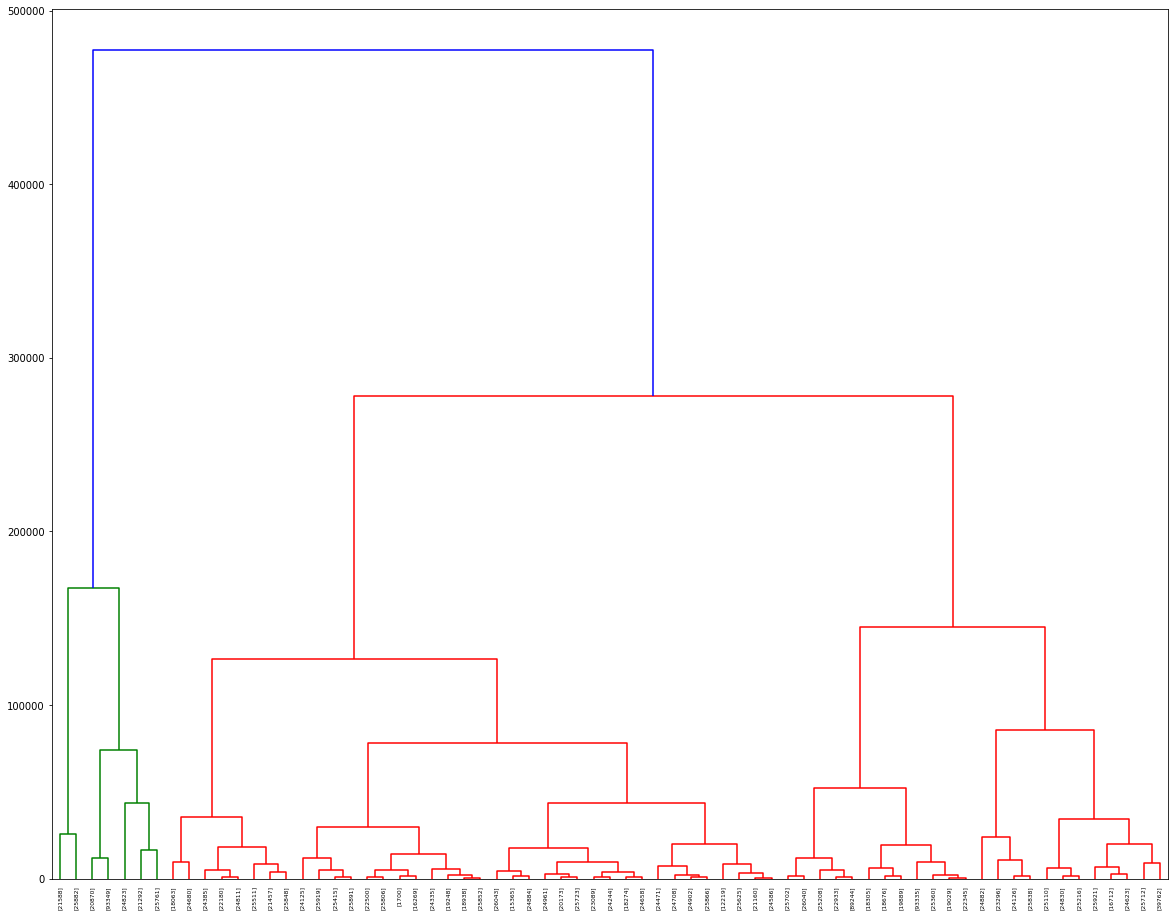

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[20, 16])
mergings = linkage(dataset[colonnes_violettes], method='complete')
dendrogram(mergings,
           labels=dataset[['FAMILLE']].values,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

### sur données scalées

C:\Users\F279814\AppData\Local\Continuum\anaconda3\envs\datacamp\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


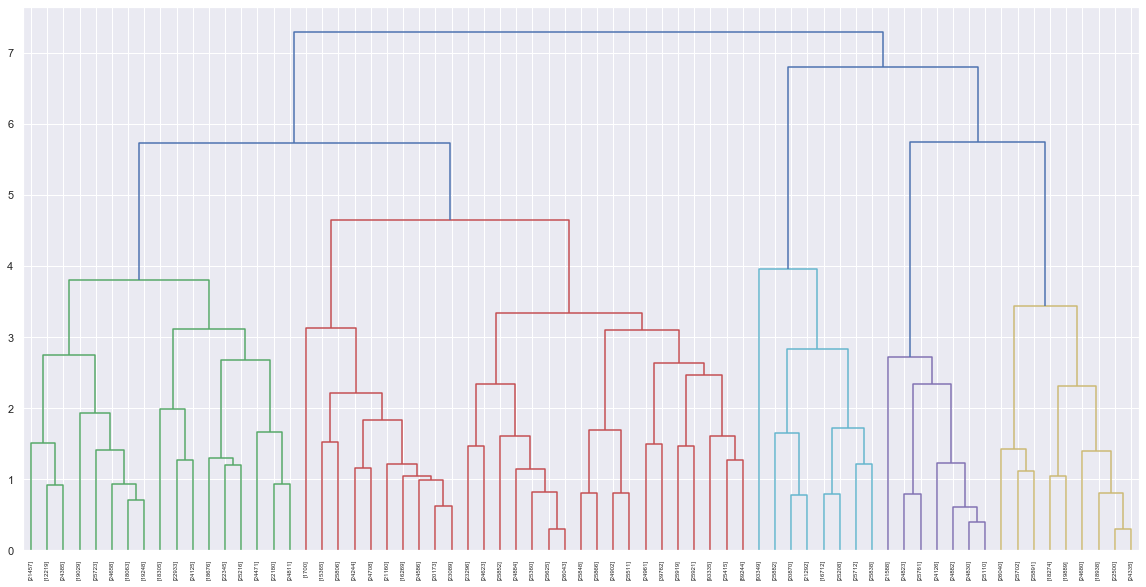

In [35]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[20, 10])
mergings = linkage(dataset_scaled, method='complete')
dendrogram(mergings,
           labels=dataset[['FAMILLE']].values,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

## tSNE

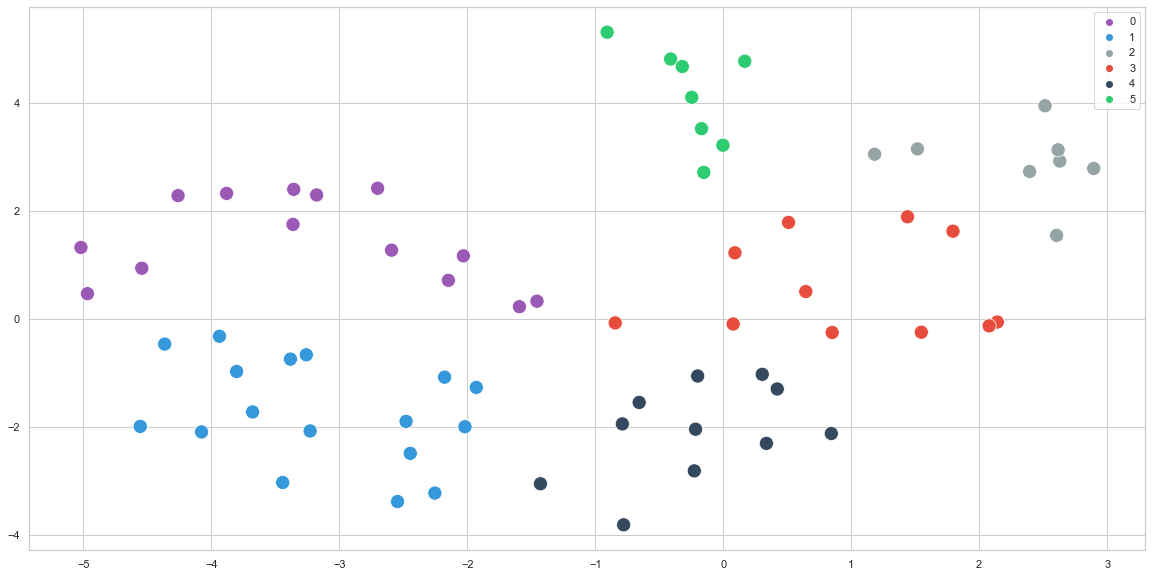

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(dataset[colonnes_violettes])
labels = pipeline.predict(dataset[colonnes_violettes])


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Set2", n_colors=6, desat=.5), n_colors=6)
plt.figure(figsize=[20, 10])

from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
sns.set_style("whitegrid")

transformed = model.fit_transform(dataset_scaled)
xs = transformed[:,0]
ys = transformed[:,1]
#plt.scatter(xs, ys, c=labels)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
g = sns.scatterplot(x=xs, y=ys, hue=labels, palette=flatui, legend='full', s=200)
plt.show()


In [56]:
dataset

,FAMILLE,FILIERE,POSTE,FILIERE PMU,Cond TH,Masse V,Chaleur M,K (Pa.s),n,Alpha,T alpha (K)
0,1700,PL,GI,Mixes_GI,0.220,1119,1599,232830.000000,0.184805,1218.810000,330
1,12219,PL,KM,Mixes_KMSC_PL,0.253,1096,1472,190213.000000,0.170976,775.992000,330
2,15365,PL,PS,Mixes_Internal,0.231,1062,1520,197370.235368,0.162797,1153.704386,330
3,16269,PL,BT,Mixes_Internal,0.240,1091,1500,231399.514903,0.172000,1061.235435,330
4,16712,PL,KM,Mixes_KMSC_PL,0.258,1097,1477,320671.282949,0.187219,2043.111236,330
...,...,...,...,...,...,...,...,...,...,...,...
64,26043,TO,KM,Mixes_KMSC_TC,0.254,1201,1511,200224.000000,0.148500,517.278000,330
65,39762,TO,KM,Mixes_KMSC_TC,0.254,1162,1551,334000.000000,0.196000,1457.000000,330
66,89244,PL,KM,Mixes_KMSC_PL,0.228,1150,1540,306594.000000,0.179913,1038.590000,330
67,93335,PL,KM,Mixes_KMSC_PL,0.232,1186,1548,273713.213317,0.128641,1237.014630,330


In [59]:
dataset['label']=labels


In [60]:
dataset

,FAMILLE,FILIERE,POSTE,FILIERE PMU,Cond TH,Masse V,Chaleur M,K (Pa.s),n,Alpha,T alpha (K),label
0,1700,PL,GI,Mixes_GI,0.220,1119,1599,232830.000000,0.184805,1218.810000,330,4
1,12219,PL,KM,Mixes_KMSC_PL,0.253,1096,1472,190213.000000,0.170976,775.992000,330,3
2,15365,PL,PS,Mixes_Internal,0.231,1062,1520,197370.235368,0.162797,1153.704386,330,4
3,16269,PL,BT,Mixes_Internal,0.240,1091,1500,231399.514903,0.172000,1061.235435,330,4
4,16712,PL,KM,Mixes_KMSC_PL,0.258,1097,1477,320671.282949,0.187219,2043.111236,330,5
...,...,...,...,...,...,...,...,...,...,...,...,...
64,26043,TO,KM,Mixes_KMSC_TC,0.254,1201,1511,200224.000000,0.148500,517.278000,330,1
65,39762,TO,KM,Mixes_KMSC_TC,0.254,1162,1551,334000.000000,0.196000,1457.000000,330,1
66,89244,PL,KM,Mixes_KMSC_PL,0.228,1150,1540,306594.000000,0.179913,1038.590000,330,4
67,93335,PL,KM,Mixes_KMSC_PL,0.232,1186,1548,273713.213317,0.128641,1237.014630,330,1


In [65]:
dataset.to_csv('pour_gaetan.csv')

In [64]:
dataset['x']=xs
dataset['y']=ys